In [53]:
import pandas as pd
import matplotlib.pyplot as plt
df1= pd.read_excel('Analytics_Test_&_Data Set_Instructions.xlsx', sheet_name='RFI Data')

df2=pd.read_excel('Analytics_Test_&_Data Set_Instructions.xlsx', sheet_name='RFI_Clean_Data')

In [13]:
df1.dtypes

Campaign                         object
Month                    datetime64[ns]
Site (Site Directory)            object
Placement - DCM                  object
Creative                         object
Creative Dimensions              object
Platform Type                    object
Impressions                       int64
Clicks                            int64
Unnamed: 9                      float64
CTR                             float64
dtype: object

In [54]:
df1['Month'] = pd.to_datetime(df1['Month'])
def format_without_sci(x):
    return '{:.0f}'.format(x)

# Set the float_format option to use the custom formatting function
pd.options.display.float_format = format_without_sci

# Use describe() to get summary statistics
summary = df1.describe()
summary

,Impressions,Clicks,Unnamed: 9
count,4244,4244,40
mean,26638,70,1
std,133656,667,0
min,0,0,1
25%,11,0,1
50%,609,1,1
75%,9265,10,1
max,3596390,22067,2


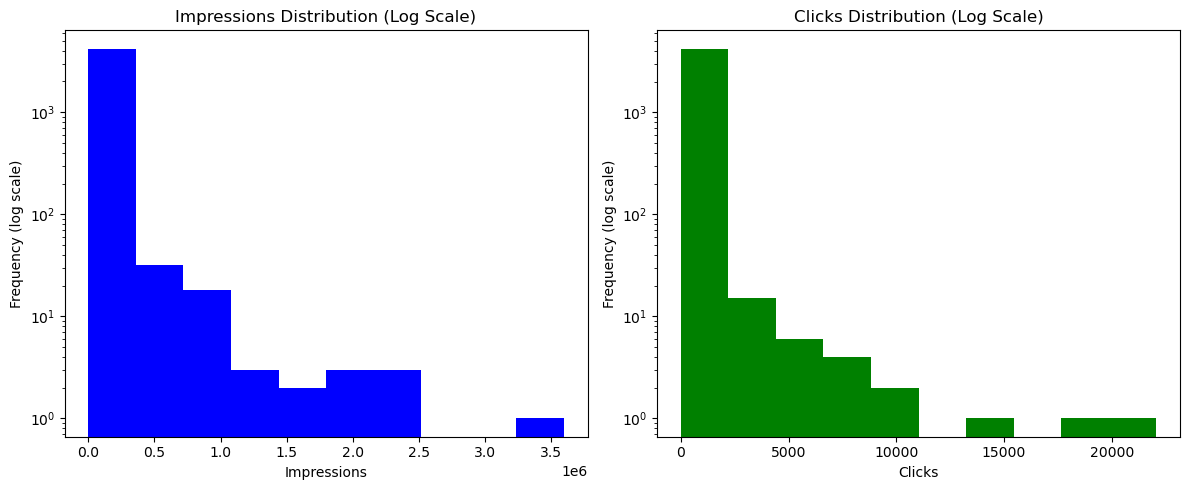

In [55]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df1['Impressions'], bins=10, color='blue', log=True)
plt.title('Impressions Distribution (Log Scale)')
plt.xlabel('Impressions')
plt.ylabel('Frequency (log scale)')

plt.subplot(1, 2, 2)
plt.hist(df1['Clicks'], bins=10, color='green', log=True)
plt.title('Clicks Distribution (Log Scale)')
plt.xlabel('Clicks')
plt.ylabel('Frequency (log scale)')

plt.tight_layout()

plt.show()

In [6]:
#Queremos saber cuales son las variables continuas y cuales son las categoricaa
data_type=df1.dtypes
data_type

Campaign                         object
Month                    datetime64[ns]
Site (Site Directory)            object
Placement - DCM                  object
Creative                         object
Creative Dimensions              object
Platform Type                    object
Impressions                       int64
Clicks                            int64
Unnamed: 9                      float64
dtype: object

In [56]:
df1['CTR'] = (df1['Clicks'] / df1['Impressions']) * 100

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Campaign               4244 non-null   object        
 1   Month                  4244 non-null   datetime64[ns]
 2   Site (Site Directory)  4244 non-null   object        
 3   Placement - DCM        4244 non-null   object        
 4   Creative               4244 non-null   object        
 5   Creative Dimensions    4244 non-null   object        
 6   Platform Type          3668 non-null   object        
 7   Impressions            4244 non-null   int64         
 8   Clicks                 4244 non-null   int64         
 9   Unnamed: 9             40 non-null     float64       
 10  CTR                    3925 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 364.8+ KB


In [58]:
import pandas as pd

# Load your dataset
df = pd.read_excel('Analytics_Test_&_Data Set_Instructions.xlsx', sheet_name='RFI Data')

# Calculate CTR for each campaign
df['CTR'] = (df['Clicks'] / df['Impressions']) * 100

# Group the data by campaign to calculate total Impressions and Clicks
site_summary = df.groupby('Site (Site Directory)')[['Impressions', 'Clicks']].sum().reset_index()

# Display the results
print("CTR and Campaign Summary:")
print(df[['Campaign', 'CTR']])

print("\nTotal Impressions and Clicks by Campaign:")
print(site_summary)

CTR and Campaign Summary:
                                        Campaign  CTR
0     200 Arabia Dermicool FY21 SDP DTP Media PT    2
1     200 Arabia Dermicool FY21 SDP DTP Media PT    1
2     200 Arabia Dermicool FY21 SDP DTP Media PT    0
3     200 Arabia Dermicool FY21 SDP DTP Media PT    1
4     200 Arabia Dermicool FY21 SDP DTP Media PT    1
...                                          ...  ...
4239  200 Arabia Dermicool FY21 SDP DTP Media PT    0
4240  200 Arabia Dermicool FY21 SDP DTP Media PT    0
4241  200 Arabia Dermicool FY21 SDP DTP Media PT    0
4242  200 Arabia Dermicool FY21 SDP DTP Media PT    0
4243  200 Arabia Dermicool FY21 SDP DTP Media PT    0

[4244 rows x 2 columns]

Total Impressions and Clicks by Campaign:
       Site (Site Directory)  Impressions  Clicks
0          Adprime Media Inc            0    3328
1                 Adtheorent       123485     153
2               Aptus Health     25645693   43738
3                      Emodo      8675610   11119
4       

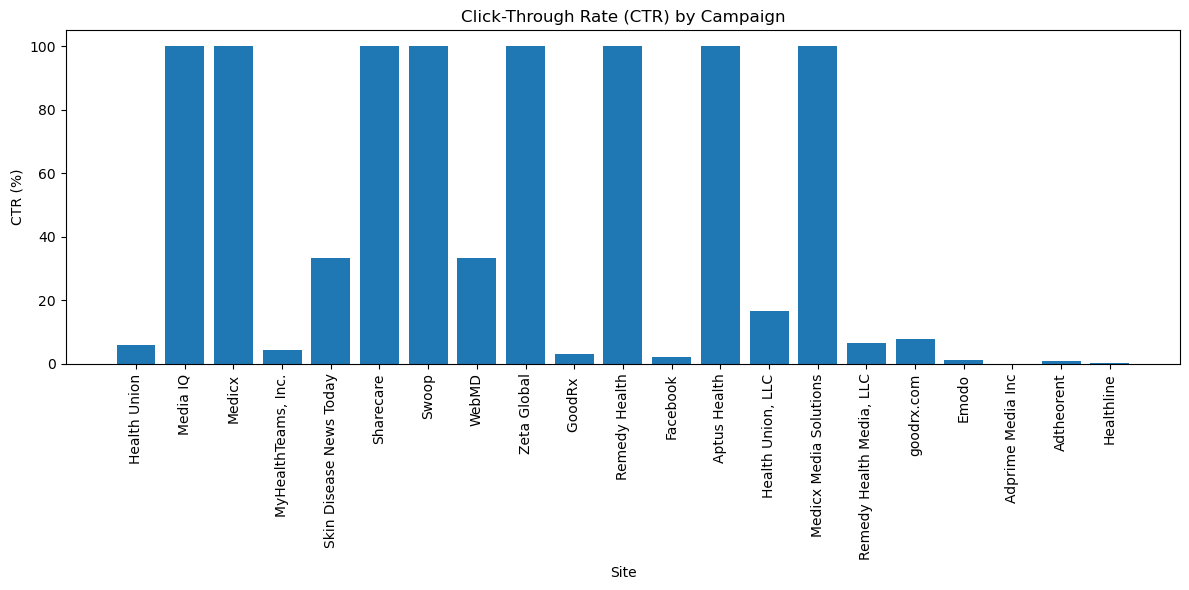

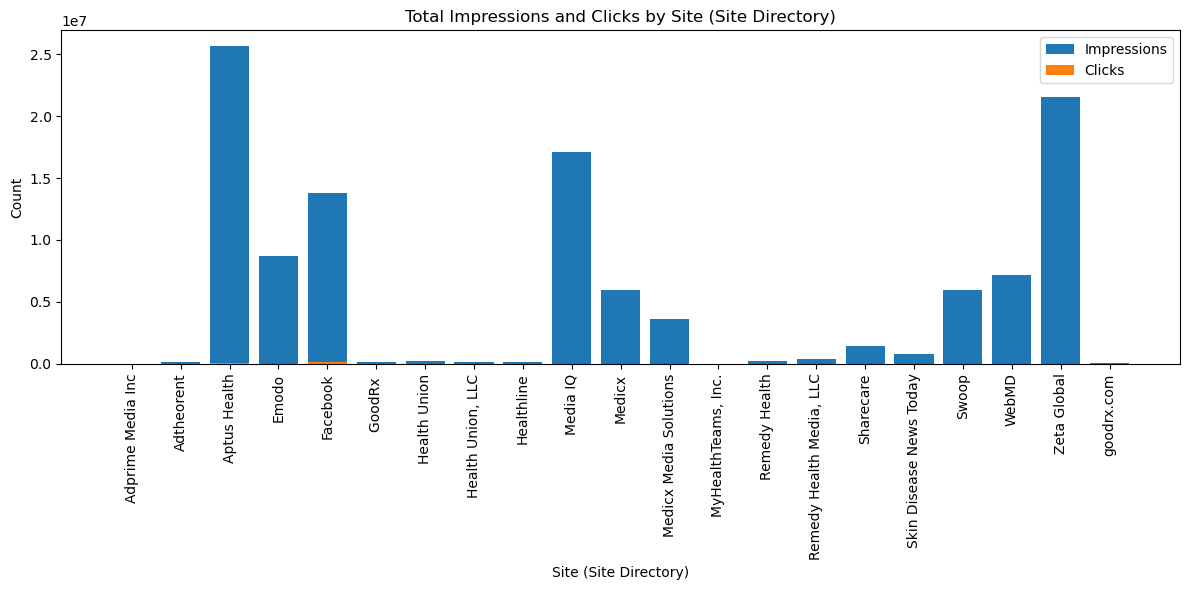

In [59]:
plt.figure(figsize=(12, 6))
plt.bar(df['Site (Site Directory)'], df['CTR'])
plt.xticks(rotation=90)
plt.xlabel('Site')
plt.ylabel('CTR (%)')
plt.title('Click-Through Rate (CTR) by Campaign')
plt.tight_layout()
plt.show()

# Plot Total Impressions and Clicks by Site (Site Directory)
plt.figure(figsize=(12, 6))
plt.bar(site_summary['Site (Site Directory)'], site_summary['Impressions'], label='Impressions')
plt.bar(site_summary['Site (Site Directory)'], site_summary['Clicks'], label='Clicks')
plt.xticks(rotation=90)
plt.xlabel('Site (Site Directory)')
plt.ylabel('Count')
plt.title('Total Impressions and Clicks by Site (Site Directory)')
plt.legend()
plt.tight_layout()
plt.show()

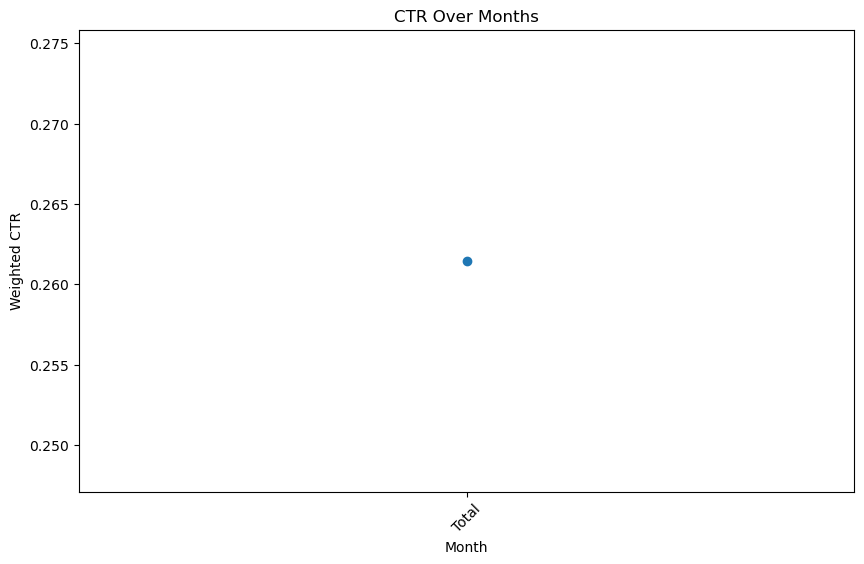

In [70]:
import matplotlib.pyplot as plt
import pandas as pd



def calculate_ctr(row):
    clicks = row['Clicks']
    impressions = row['Impressions']
    if impressions == 0 or clicks == 0:
        return 0
    return (clicks / impressions) * 100

# Apply the function to each row
df1['CTR'] = df1.apply(calculate_ctr, axis=1)

# Drop rows with missing CTR values
df1 = df1.dropna(subset=['CTR'])

# Group data by 'Site (Site Directory)' and calculate the average CTR
site_ctr = df1.groupby('Site (Site Directory)')['CTR'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
site_ctr.plot(kind='bar')
plt.title('Expected CTR by Site')
plt.xlabel('Site')
plt.ylabel('Expected CTR')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Annotate each bar with the CTR value
for i, ctr in enumerate(site_ctr):
    plt.annotate(f'{ctr:.2f}', (i, ctr), ha='center', va='bottom')

plt.show()

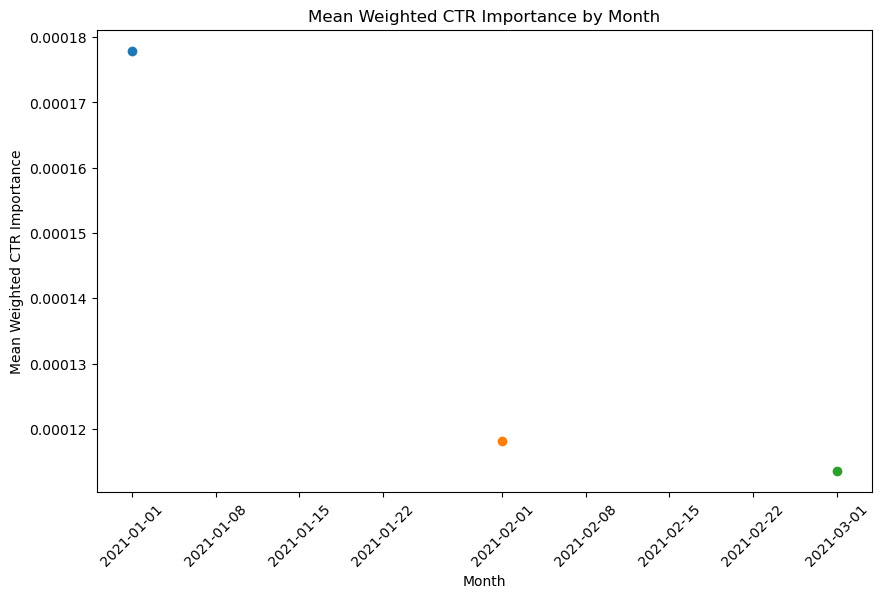

In [78]:
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame in Power BI

# Calculate CTR with row-specific weights
df1['Weighted_CTR'] = (df1['Clicks'] / df1['Impressions']) * 100

# Create a new column 'Importance' based on total impressions and clicks
total_clicks = df1['Clicks'].sum()
total_impressions = df1['Impressions'].sum()
df1['Importance'] = (df1['Clicks'] + df1['Impressions']) / (total_clicks + total_impressions)

# Calculate CTR weighted by importance
df1['Weighted_CTR_Importance'] = df1['Weighted_CTR'] * df1['Importance']

# Group data by 'Month' and calculate the mean of 'Weighted_CTR_Importance' for each month
monthly_mean_weighted_ctr = df1.groupby('Month')['Weighted_CTR_Importance'].mean()

# Plot the data for each month
plt.figure(figsize=(10, 6))
for month, data in monthly_mean_weighted_ctr.items():
    plt.plot([month], [data], marker='o', linestyle='-')

plt.title('Mean Weighted CTR Importance by Month')
plt.xlabel('Month')
plt.ylabel('Mean Weighted CTR Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the graph in the Power BI report
plt.show()


# Now 'Weighted_CTR_Importance' contains CTR values weighted by importance


In [79]:
monthly_mean_weighted_ctr

Month
2021-01-01     0
2021-02-01     0
2021-03-01     0
2021-04-01   NaN
2021-05-01   NaN
2021-06-01   NaN
2021-07-01   NaN
2021-08-01   NaN
2021-09-01   NaN
2021-10-01   NaN
Name: Weighted_CTR_Importance, dtype: float64

In [74]:
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame in Power BI

# Sort the DataFrame by 'Timestamp' if not already sorted
df1 = df1.sort_values(by='Timestamp')

# Plot the 'Weighted_CTR_Importance' values over time
plt.figure(figsize=(10, 6))
plt.plot(df1['Timestamp'], df1['Weighted_CTR_Importance'], marker='o', linestyle='-')
plt.title('Weighted CTR Importance Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Weighted CTR Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the graph in the Power BI report
plt.show()


KeyError: 'Timestamp'

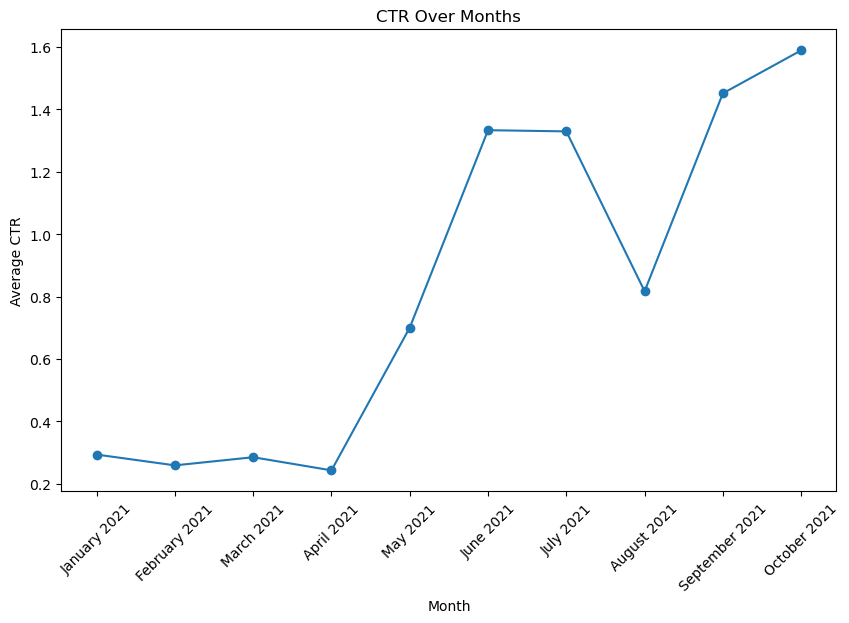

In [80]:
# Assuming 'df1' is your DataFrame in Power BI

# Group data by 'Month' and calculate the average CTR
monthly_ctr = df1.groupby('Month')['CTR'].mean()

# Extract the month names from the 'Month' column
month_names = monthly_ctr.index.strftime('%B %Y')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(month_names, monthly_ctr, marker='o', linestyle='-')
plt.title('CTR Over Months')
plt.xlabel('Month')
plt.ylabel('Average CTR')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the graph in the Power BI report
plt.show()

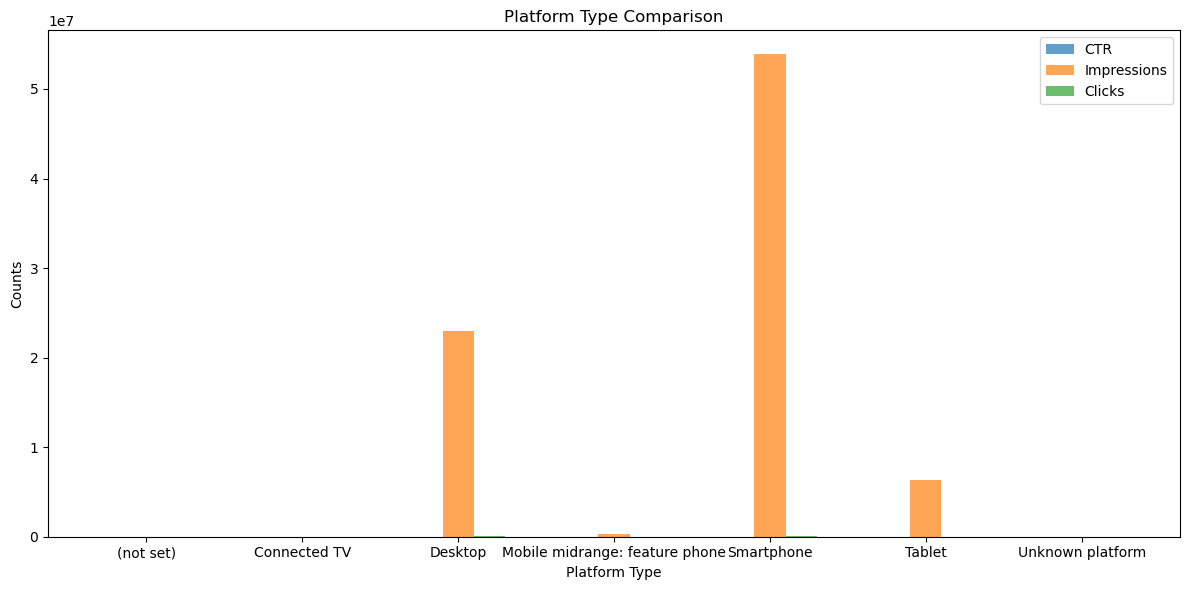

In [10]:
platform_summary = df.groupby('Platform Type')[['CTR', 'Impressions', 'Clicks']].sum().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Define the width of each bar
bar_width = 0.2

# Set the positions for the bars
x = range(len(platform_summary))

# Create the bars for CTR, Impressions, and Clicks
plt.bar(x, platform_summary['CTR'], width=bar_width, label='CTR', align='center', alpha=0.7)
plt.bar([i + bar_width for i in x], platform_summary['Impressions'], width=bar_width, label='Impressions', align='center', alpha=0.7)
plt.bar([i + bar_width * 2 for i in x], platform_summary['Clicks'], width=bar_width, label='Clicks', align='center', alpha=0.7)

# Set the x-axis labels and rotate them for readability
plt.xticks([i + bar_width for i in x], platform_summary['Platform Type'], rotation=0)

# Add labels, legends, and a title
plt.xlabel('Platform Type')
plt.ylabel('Counts')
plt.title('Platform Type Comparison')
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()

In [19]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Campaign               4244 non-null   object
 1   Month                  4244 non-null   object
 2   Site (Site Directory)  4244 non-null   object
 3   Placement - DCM        4244 non-null   object
 4   Creative               4244 non-null   object
 5   Creative Dimensions    4244 non-null   object
 6   Platform Type          3668 non-null   object
 7   Impressions            4244 non-null   int64 
 8   Clicks                 4244 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 298.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Campaign               4244 non-null   object
 1   Month                  4244 non-null   object
 2   Site (Site Directory)  4244 non-null   object
 3   Placement - DCM        4244 non-null   object
 4   Creative               4244 non-null   object
 5   Creative Dimensions    4244 non-null   object
 6   Platform Type          3668 non-null   object
 7   Impressions            4244 non-null   int64 
 8   Clicks                 4244 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 298.5+ KB


### Dataset 2


In [23]:
df2=pd.read_excel('Analytics_Test_&_Data Set_Instructions.xlsx', sheet_name='Raw GA Data')

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Source            2403 non-null   object
 1   Month of Year     2403 non-null   int64 
 2   Device Category   2223 non-null   object
 3   Ad Content        2403 non-null   object
 4   Sessions          2403 non-null   int64 
 5   Users             2403 non-null   int64 
 6   New Users         2403 non-null   int64 
 7   Pageviews         2403 non-null   int64 
 8   Session Duration  2403 non-null   int64 
 9   Calculated AToS   2403 non-null   object
dtypes: int64(6), object(4)
memory usage: 187.9+ KB


In [31]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Source            2403 non-null   object
 1   Month of Year     2403 non-null   int64 
 2   Device Category   2223 non-null   object
 3   Ad Content        2403 non-null   object
 4   Sessions          2403 non-null   int64 
 5   Users             2403 non-null   int64 
 6   New Users         2403 non-null   int64 
 7   Pageviews         2403 non-null   int64 
 8   Session Duration  2403 non-null   int64 
 9   Calculated AToS   2403 non-null   object
dtypes: int64(6), object(4)
memory usage: 187.9+ KB


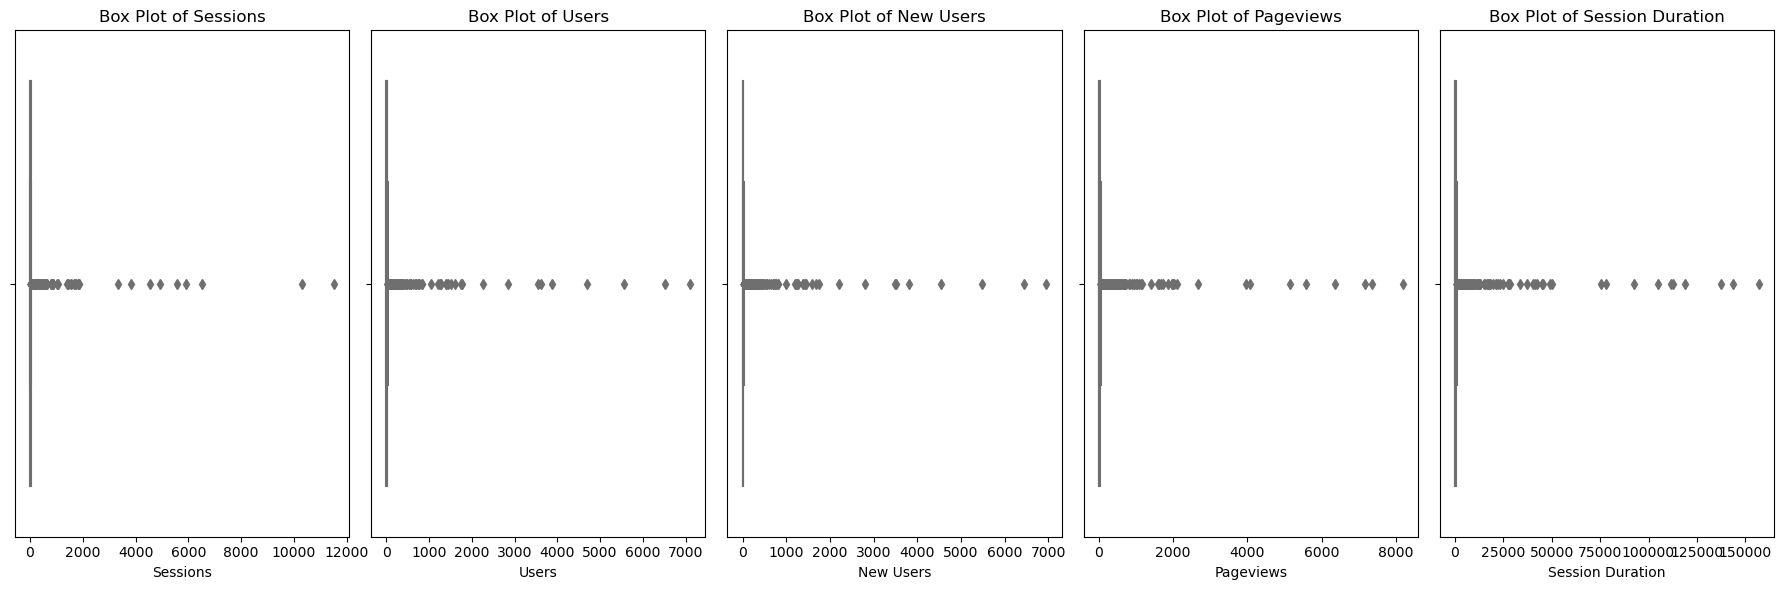

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df2 with the relevant columns

# Define the columns to create boxplots for
columns_to_plot = ["Sessions", "Users", "New Users", "Pageviews", "Session Duration"]

# Create a figure with subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(18, 6))

# Create boxplots for each variable
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=col, data=df2, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_xlabel(col)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


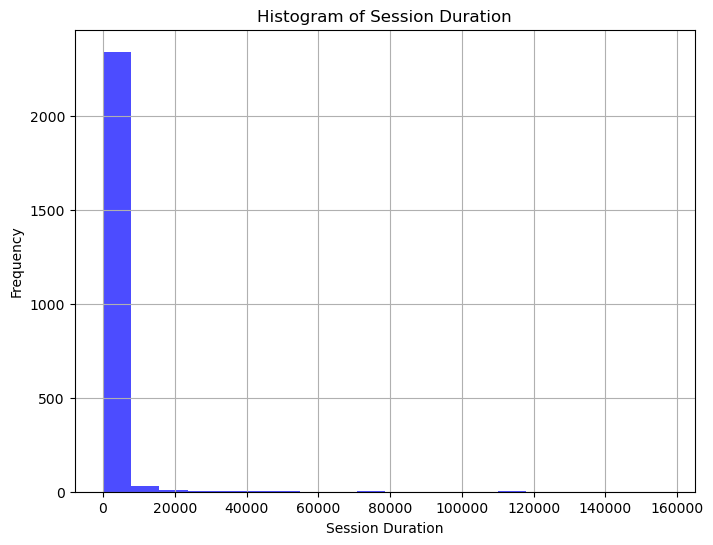

NameError: name 'new_users_data' is not defined

<Figure size 1000x500 with 0 Axes>

In [38]:
campaign_data = df2.groupby(["Source", "Ad Content", "Device Category"]).agg(
    {'Sessions': 'sum', 'Users': 'sum', 'New Users': 'sum', 'Pageviews': 'sum', 'Session Duration': 'mean'}
).reset_index()


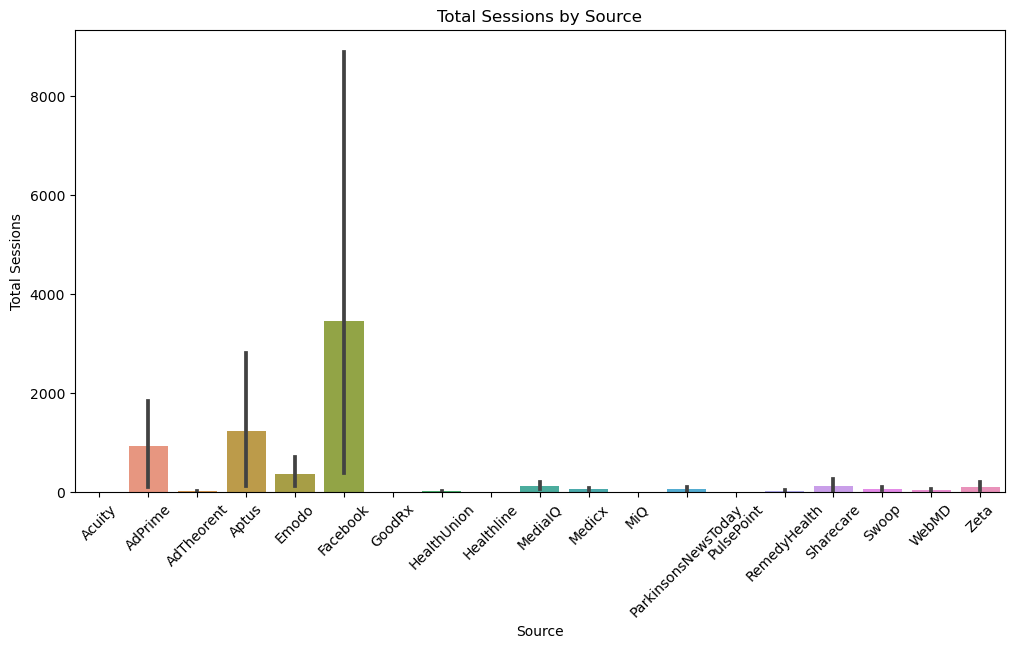

In [39]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Source', y='Sessions', data=campaign_data)
plt.title("Total Sessions by Source")
plt.xlabel("Source")
plt.ylabel("Total Sessions")
plt.xticks(rotation=45)
plt.show()


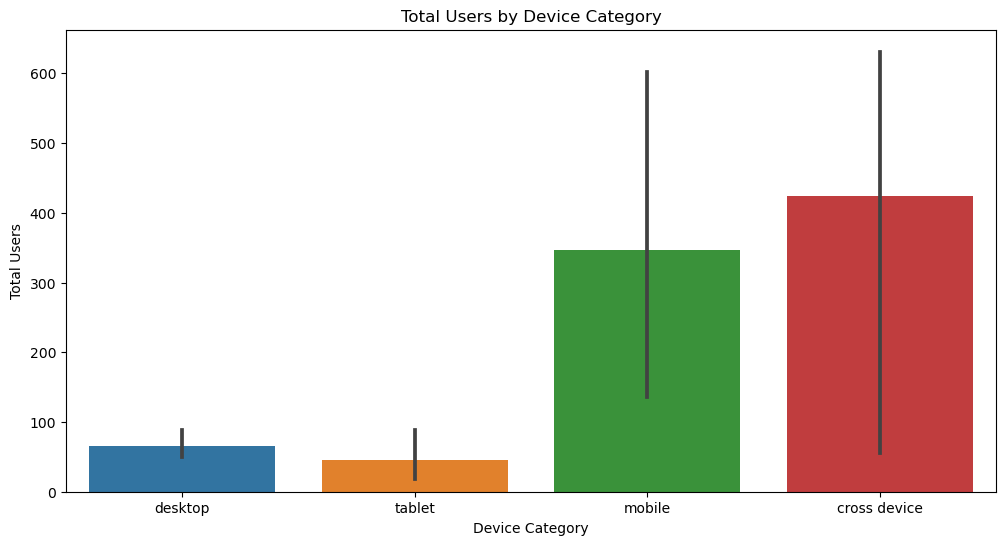

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='Device Category', y='Users', data=campaign_data)
plt.title("Total Users by Device Category")
plt.xlabel("Device Category")
plt.ylabel("Total Users")
plt.show()


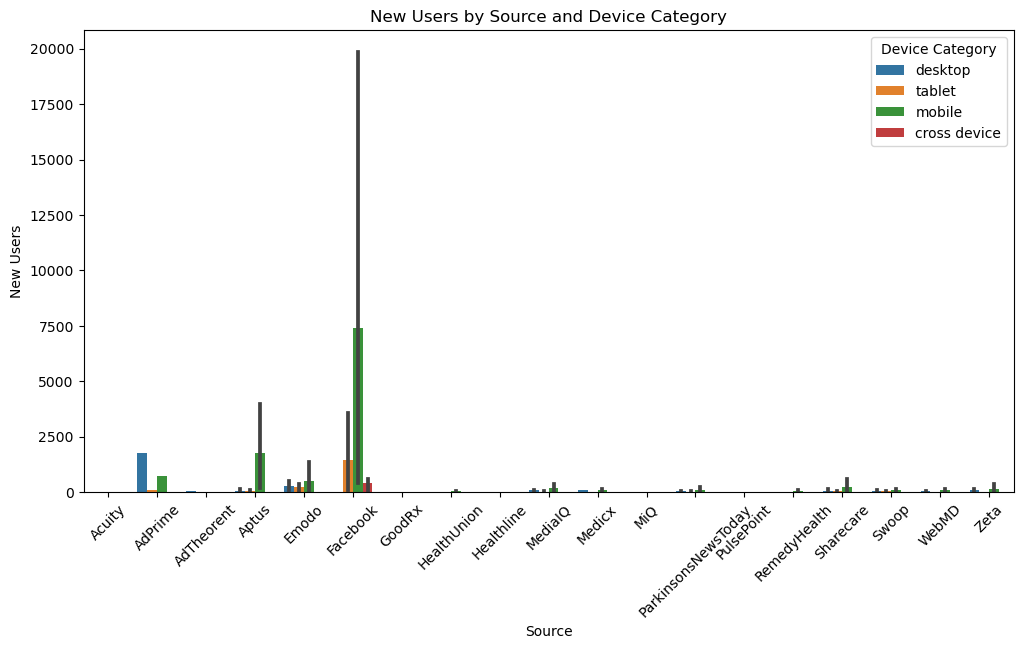

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Source', y='New Users', hue='Device Category', data=campaign_data)
plt.title("New Users by Source and Device Category")
plt.xlabel("Source")
plt.ylabel("New Users")
plt.legend(title="Device Category")
plt.xticks(rotation=45)
plt.show()


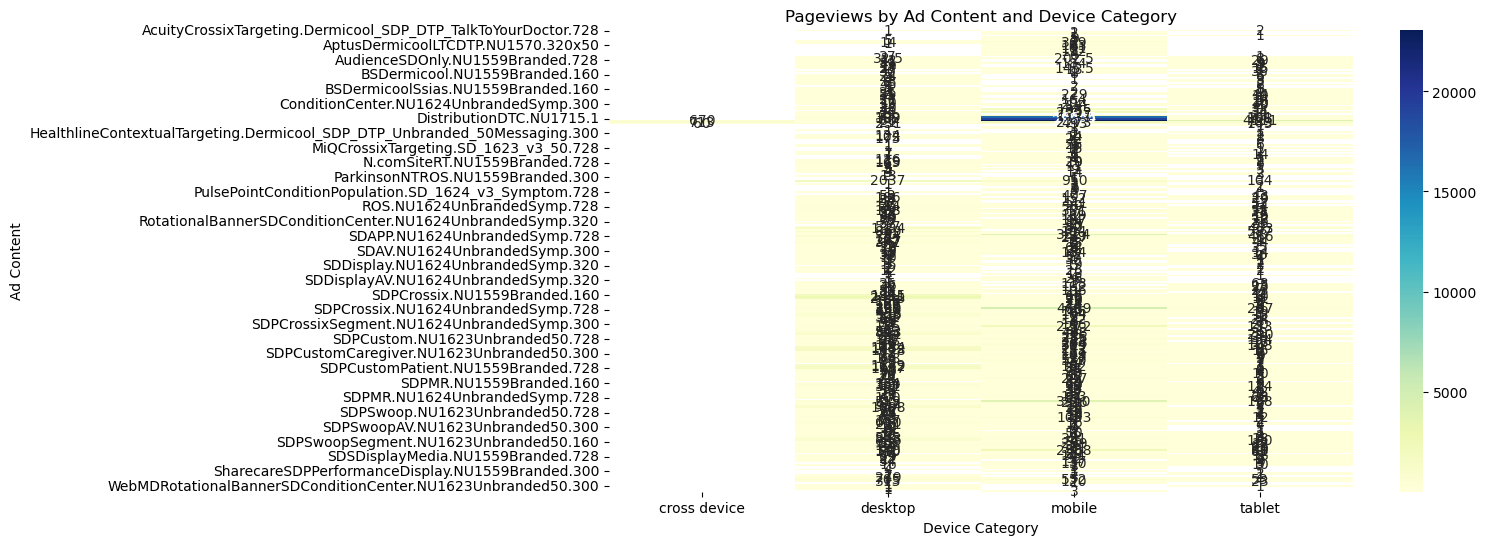

In [42]:
pivot_table = campaign_data.pivot_table(values='Pageviews', index='Ad Content', columns='Device Category')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title("Pageviews by Ad Content and Device Category")
plt.xlabel("Device Category")
plt.ylabel("Ad Content")
plt.show()


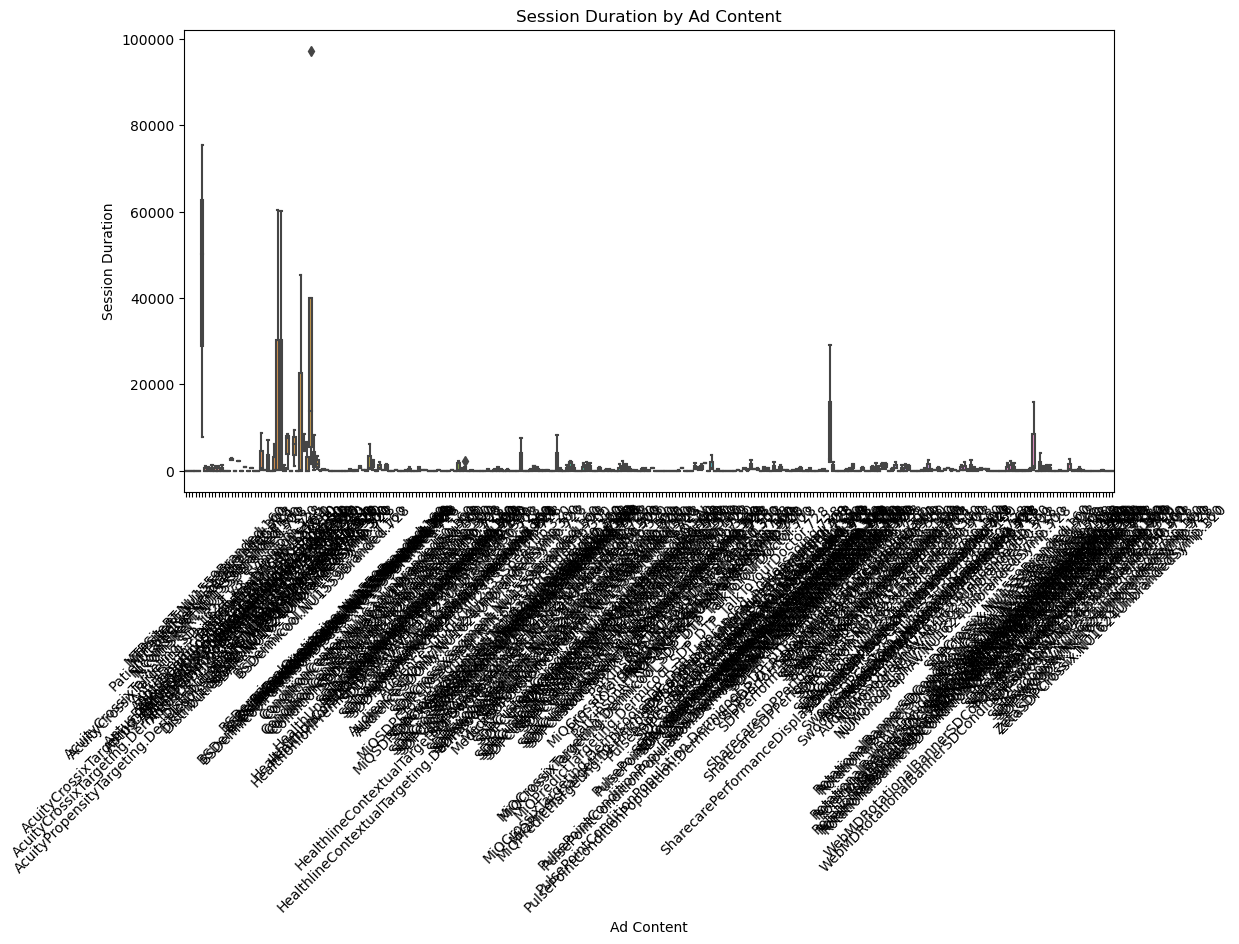

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ad Content', y='Session Duration', data=campaign_data)
plt.title("Session Duration by Ad Content")
plt.xlabel("Ad Content")
plt.ylabel("Session Duration")
plt.xticks(rotation=45)
plt.show()


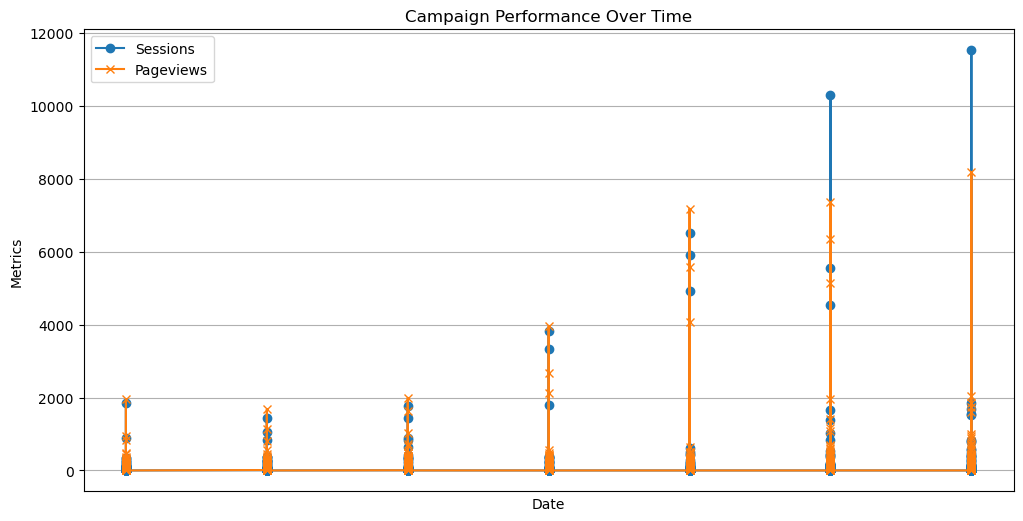

In [47]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with a date or timestamp column
df2['Month of Year'] = pd.to_datetime(df2['Month of Year'])  # Convert to datetime if needed
plt.figure(figsize=(12, 6))
plt.plot(df2['Month of Year'], df2['Sessions'], label='Sessions', marker='o')
plt.plot(df2['Month of Year'], df2['Pageviews'], label='Pageviews', marker='x')
plt.title("Campaign Performance Over Time")
plt.xlabel("Date")
plt.ylabel("Metrics")
plt.legend()
plt.grid(True)
plt.show()


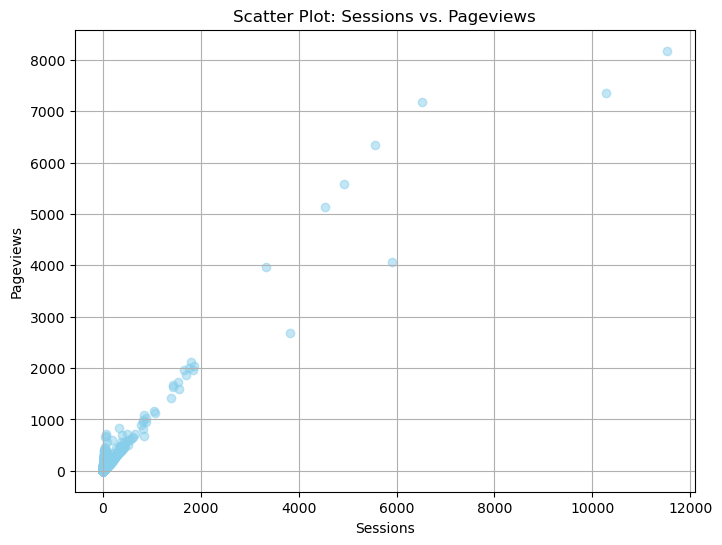

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(df2['Sessions'], df2['Pageviews'], alpha=0.5, color='skyblue')
plt.title("Scatter Plot: Sessions vs. Pageviews")
plt.xlabel("Sessions")
plt.ylabel("Pageviews")
plt.grid(True)


C:\Users\David\AppData\Local\Temp\ipykernel_21692\3403991228.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


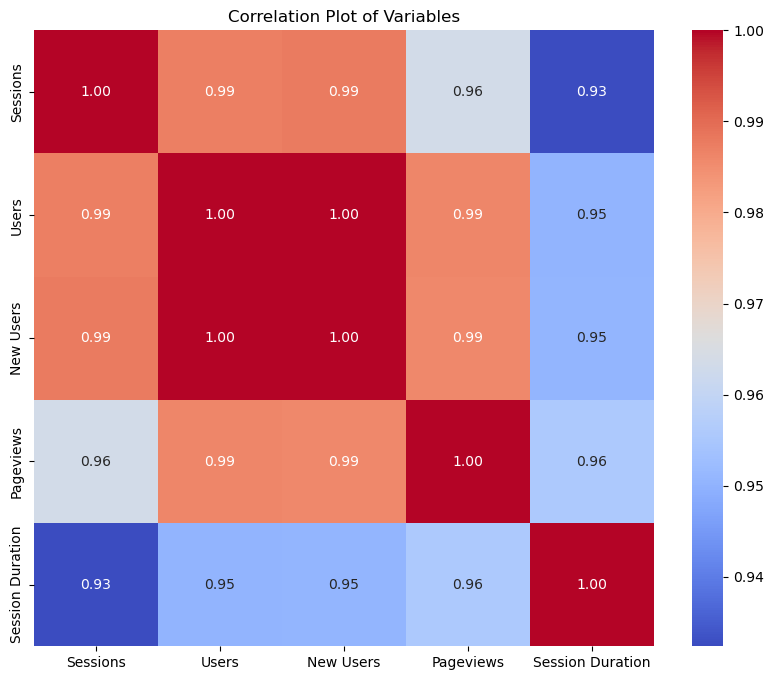

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df2 with the relevant columns

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Plot of Variables")
plt.show()


C:\Users\David\AppData\Local\Temp\ipykernel_21692\33885989.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


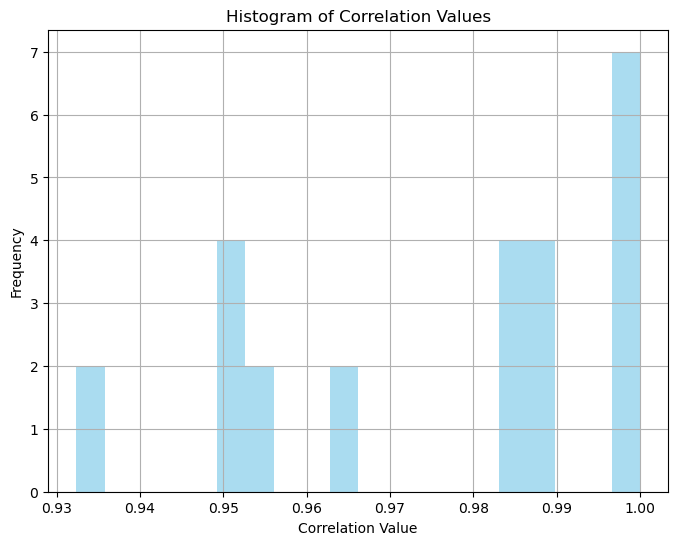

[1.0, 0.9873190159850888, 0.9876805920826579, 0.9634159171923039, 0.932374110901437, 0.9873190159850888, 1.0, 0.9999491470017924, 0.9860123944615954, 0.9501520002684896, 0.9876805920826579, 0.9999491470017924, 1.0, 0.9857775162771434, 0.9504067396933013, 0.9634159171923039, 0.9860123944615954, 0.9857775162771434, 1.0, 0.9556193660787149, 0.932374110901437, 0.9501520002684896, 0.9504067396933013, 0.9556193660787149, 1.0]


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df2 with the relevant columns

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Extract the correlation values and store them in a list
correlation_values = correlation_matrix.values.flatten().tolist()

# Create a histogram to visualize the distribution of correlation values
plt.figure(figsize=(8, 6))
plt.hist(correlation_values, bins=20, color='skyblue', alpha=0.7)
plt.title("Histogram of Correlation Values")
plt.xlabel("Correlation Value")
plt.ylabel("Frequency")
plt.grid(True)

# Display the plot
plt.show()

# If you want to inspect the correlation values list, you can print it
print(correlation_values)


In [52]:
import pandas as pd

# Assuming you have a DataFrame named df2 with the relevant columns

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Extract the correlation values and their corresponding column pairs
correlation_values = []
column_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        column1 = correlation_matrix.columns[i]
        column2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]
        correlation_values.append(correlation)
        column_pairs.append(f"{column1} - {column2}")

# Create a list of tuples with column pairs and their corresponding correlation values
correlation_list = list(zip(column_pairs, correlation_values))

# Print the list of column pairs and correlation values
for pair, value in correlation_list:
    print(f"{pair}: {value}")


Sessions - Users: 0.9873190159850888
Sessions - New Users: 0.9876805920826579
Sessions - Pageviews: 0.9634159171923039
Sessions - Session Duration: 0.932374110901437
Users - New Users: 0.9999491470017924
Users - Pageviews: 0.9860123944615954
Users - Session Duration: 0.9501520002684896
New Users - Pageviews: 0.9857775162771434
New Users - Session Duration: 0.9504067396933013
Pageviews - Session Duration: 0.9556193660787149


C:\Users\David\AppData\Local\Temp\ipykernel_21692\2024073343.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


In [73]:
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame in Power BI

# Sort the DataFrame by 'Timestamp' if not already sorted
df1 = df1.sort_values(by='Timestamp')

# Plot the 'Weighted_CTR_Importance' values over time
plt.figure(figsize=(10, 6))
plt.plot(df1['Timestamp'], df1['Weighted_CTR_Importance'], marker='o', linestyle='-')
plt.title('Weighted CTR Importance Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Weighted CTR Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the graph in the Power BI report
plt.show()


KeyError: 'Timestamp'